# Anova for our analysis
We run an anova to compare ethnicities and emotions, each combination of those. We have to leave out the asians unfortunately:(

# Load in packages 

In [41]:
import numpy as np
import mne
from pathlib import Path
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm

## Load in the data and epochs

In [42]:
# ALL FROM LAURAS GROUP LEVEL ANALYSIS
# Define the directory
data_path = Path("/epochs")

# Initialize an empty list to store epochs objects
all_epochs = []

# Iterate over your saved files and load them into epochs objects
for participant in ["own_sub1", "own2_ah"]:
    # Load epochs data from each file
    epochs = mne.read_epochs(data_path / f"epochs_{participant}-epo.fif", verbose=False, preload=True)
    
    # Only keep EEG channels
    epochs.pick_types(eeg=True)
    
    # Append the loaded epochs object to the list
    all_epochs.append(epochs)

# Check the type and length of the list of epochs objects
print(type(all_epochs))  # We have now created a list of epochs objects
print(len(all_epochs))    # We have 2 epochs objects in the list

# Access the first epochs object in the list
print(type(all_epochs[0]))  # We can access the first epochs object in the list which is an Epochs object

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
<class 'list'>
2
<class 'mne.epochs.EpochsFIF'>


# N170

## Define channels and time used for the anova

In [43]:
# chosen channels for anova
picks = ['TP9', 'P7', 'P8', 'TP10'] # just random 

# time window for anova
tmin = 0.13
tmax = 0.21

## Define Factors

In [44]:
# make lists for labels in conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

# WE want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
## ADDED SUBJECT HERE
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
                current_epochs = epochs[f'{emotion}/{ethnicity}']
                data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
                data_mean = np.mean(data_current, axis=(0, 1, 2))
                # append the mean data, labels, and subject ID to the list
                data.append([i, ethnicity, emotion, data_mean])

# Make to dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'Mean'])

# see hot it looks
print(df)

    Subject Ethnicity  Emotion          Mean
0         0     white    happy  1.659194e-06
1         0     white  neutral  8.893517e-07
2         0     white      sad  1.907515e-07
3         0     black    happy  1.254517e-06
4         0     black  neutral  1.554161e-06
5         0     black      sad -2.474407e-07
6         1     white    happy  9.031432e-07
7         1     white  neutral  1.017104e-06
8         1     white      sad  1.577284e-06
9         1     black    happy  9.314225e-07
10        1     black  neutral  1.220942e-06
11        1     black      sad  1.814757e-06


# Perform anova

In [45]:
# Fit model with subject as group level
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Print the summary of the model
print(anova_results.summary())


                        Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Mean   
No. Observations:            12                 Method:                        REML   
No. Groups:                  2                  Scale:                         0.0000 
Min. group size:             6                  Log-Likelihood:                73.9258
Max. group size:             6                  Converged:                     No     
Mean group size:             6.0                                                      
--------------------------------------------------------------------------------------
                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                                    0.000    0.000  2.027 0.043  0.000  0.000
C(Ethnicity)[T.white]                        0.000    0.000  0.247 0

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

## Plot

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

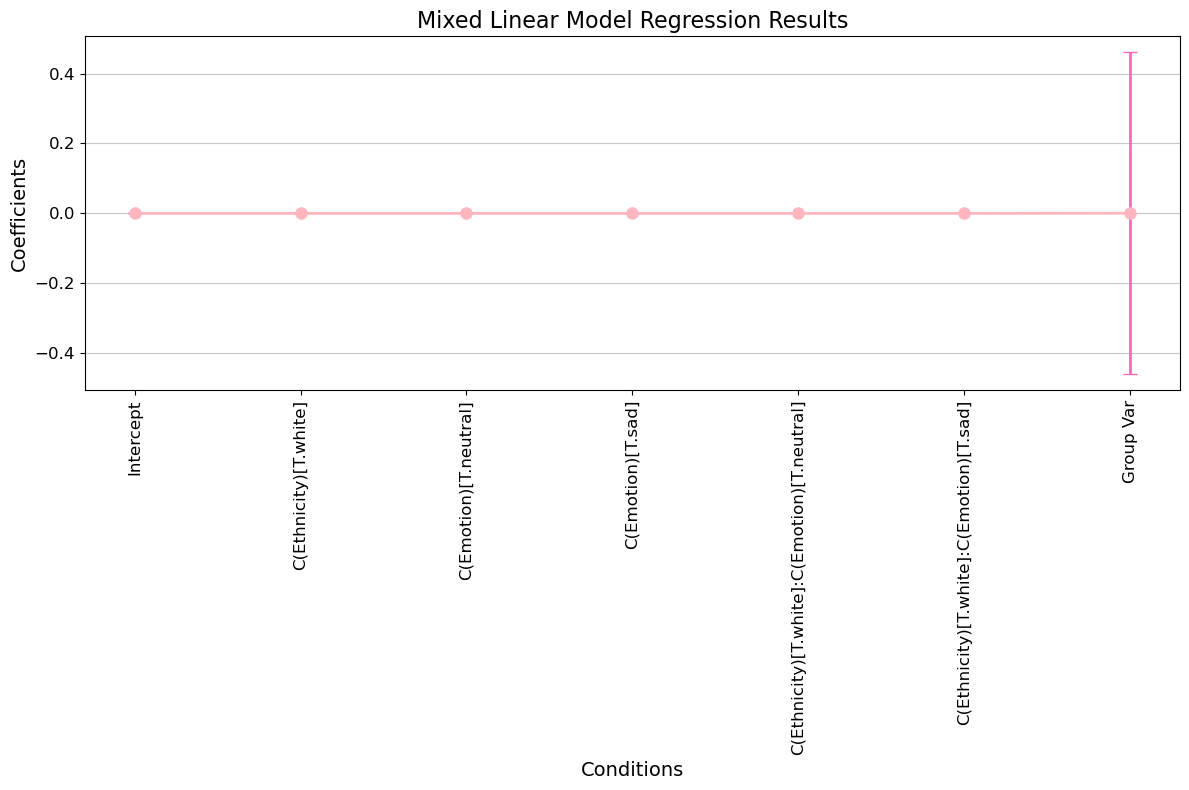

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Assuming df is already defined and loaded with data
# Fit the model
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Extract coefficients and standard errors from the fitted model
params = anova_results.params
std_err = anova_results.bse

# Extract conditions from the model summary
conditions = params.index.tolist()

# Plot with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(params)), params, yerr=std_err, fmt='o', markersize=8, capsize=5, color='lightpink', ecolor='hotpink', linestyle='-', linewidth=2)
plt.title("Mixed Linear Model Regression Results", fontsize=16)
plt.xlabel("Conditions", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.xticks(ticks=range(len(conditions)), labels=conditions, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


# EPN

In [47]:
# chosen channels for anova
picks = ['P7', 'O1', 'Oz', 'O2', 'P8'] 

# time window for anova
tmin = 0.21
tmax = 0.35

# make lists for labels in conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

# WE want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
## ADDED SUBJECT HERE
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
                current_epochs = epochs[f'{emotion}/{ethnicity}']
                data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
                data_mean = np.mean(data_current, axis=(0, 1, 2))
                # append the mean data, labels, and subject ID to the list
                data.append([i, ethnicity, emotion, data_mean])

# Make to dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'Mean'])

## FIT ANOVA

# Fit model with subject as group level
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_result = model.fit()

# Print the summary of the model
print(anova_result.summary())



                        Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Mean   
No. Observations:            12                 Method:                        REML   
No. Groups:                  2                  Scale:                         0.0000 
Min. group size:             6                  Log-Likelihood:                75.8160
Max. group size:             6                  Converged:                     Yes    
Mean group size:             6.0                                                      
--------------------------------------------------------------------------------------
                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                                    0.000    0.000  0.573 0.567 -0.000  0.000
C(Ethnicity)[T.white]                        0.000    0.000  0.772 0

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Plot

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


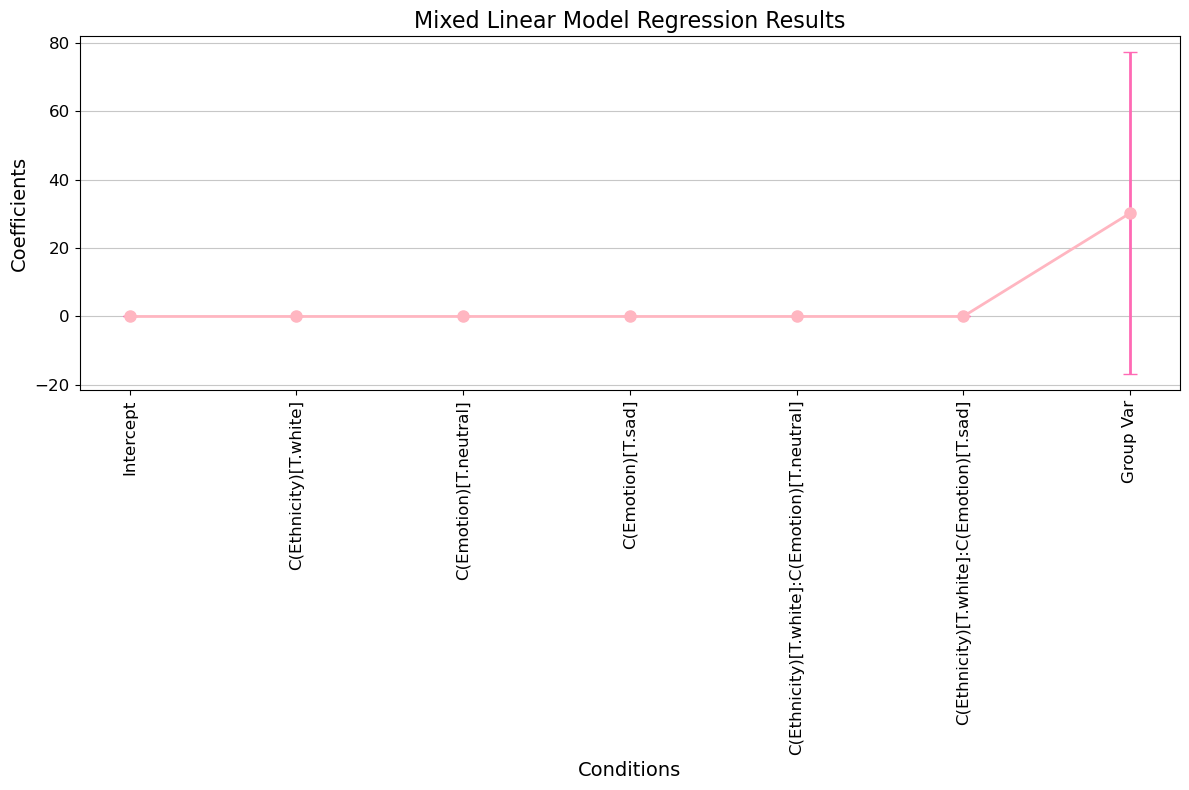

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Assuming df is already defined and loaded with data
# Fit the model
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Extract coefficients and standard errors from the fitted model
params = anova_results.params
std_err = anova_results.bse

# Extract conditions from the model summary
conditions = params.index.tolist()

# Plot with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(params)), params, yerr=std_err, fmt='o', markersize=8, capsize=5, color='lightpink', ecolor='hotpink', linestyle='-', linewidth=2)
plt.title("Mixed Linear Model Regression Results", fontsize=16)
plt.xlabel("Conditions", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.xticks(ticks=range(len(conditions)), labels=conditions, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


# P300

In [49]:
# chosen channels for anova
picks = ['CP1', 'CP2', 'P3', 'Pz', 'P4'] 

# time window for anova
tmin = 0.35
tmax = 0.8

# make lists for labels in conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

# WE want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
## ADDED SUBJECT HERE
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
                current_epochs = epochs[f'{emotion}/{ethnicity}']
                data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
                data_mean = np.mean(data_current, axis=(0, 1, 2))
                # append the mean data, labels, and subject ID to the list
                data.append([i, ethnicity, emotion, data_mean])

# Make to dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'Mean'])

## FIT ANOVA

# Fit model with subject as group level
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_result = model.fit()

# Print the summary of the model
print(anova_result.summary())



                        Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Mean   
No. Observations:            12                 Method:                        REML   
No. Groups:                  2                  Scale:                         0.0000 
Min. group size:             6                  Log-Likelihood:                74.4200
Max. group size:             6                  Converged:                     Yes    
Mean group size:             6.0                                                      
--------------------------------------------------------------------------------------
                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                                    0.000    0.000  3.024 0.002  0.000  0.000
C(Ethnicity)[T.white]                       -0.000    0.000 -0.203 0

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Plot

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


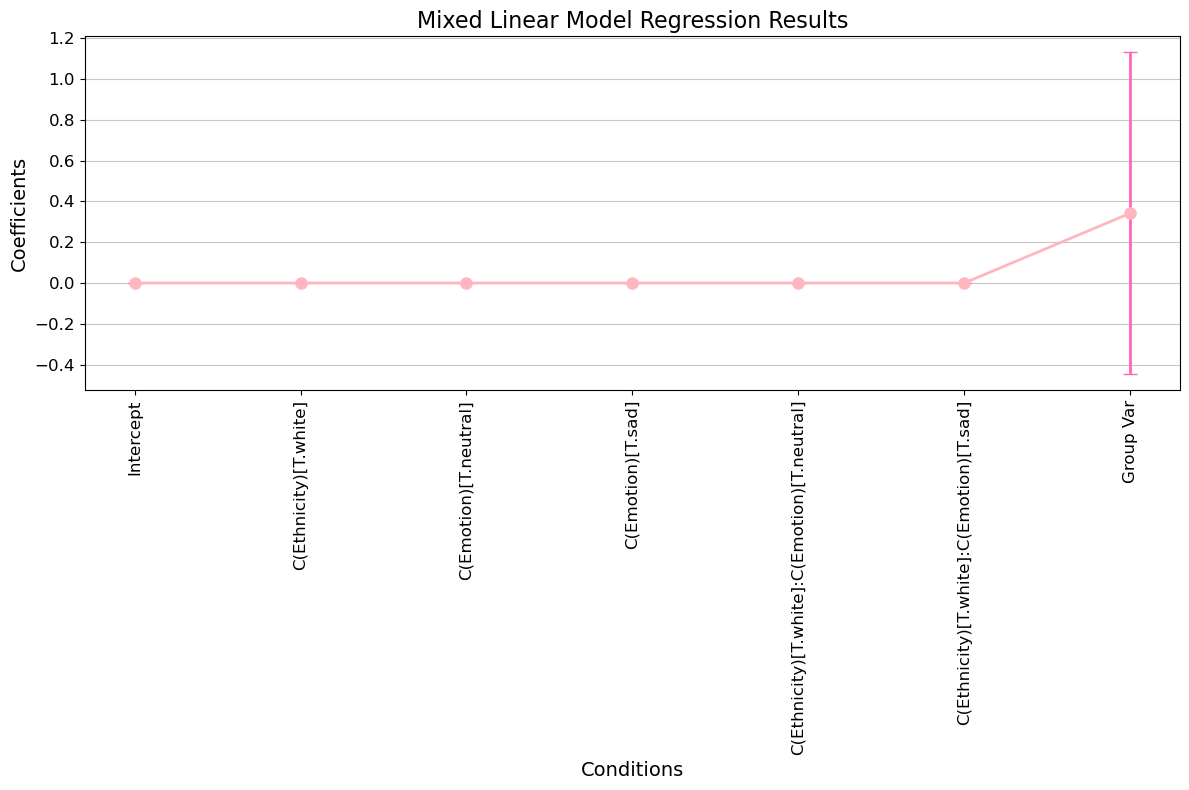

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Assuming df is already defined and loaded with data
# Fit the model
model = mixedlm('Mean ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_results = model.fit()

# Extract coefficients and standard errors from the fitted model
params = anova_results.params
std_err = anova_results.bse

# Extract conditions from the model summary
conditions = params.index.tolist()

# Plot with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(params)), params, yerr=std_err, fmt='o', markersize=8, capsize=5, color='lightpink', ecolor='hotpink', linestyle='-', linewidth=2)
plt.title("Mixed Linear Model Regression Results", fontsize=16)
plt.xlabel("Conditions", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.xticks(ticks=range(len(conditions)), labels=conditions, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()
